In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
import numpy as np
import tensorflow as tf

import strawberryfields as sf
from strawberryfields.ops import *
import pickle
import random as rd
import matplotlib.pyplot as plt
from collections.abc import Callable

from uq_new import quartic_data, get_data, memristor_update_function, multiply_three_inputs, target_function, build_circuit, train_memristor, predict_memristor


tf.get_logger().setLevel('ERROR')
warnings.filterwarnings("ignore")

In [2]:
print("Memristor time lag")
dip = 3  # Memory depth


# Generate data
X_train, y_train, X_test, y_test, _ = get_data(n_data=100, sigma_noise_1=0.0, datafunction=quartic_data)

# Train the memristor model
res_mem, phi1, phi3, x_2 = train_memristor(X_train, y_train, dip)

# Save training results
with open("results_mem_t_lag_iris.pkl", "wb") as file:
    pickle.dump(res_mem, file)


Memristor time lag
Training memristor model
Initial parameters: phi1=4.040292739868164, phi3=0.21840758621692657, x_2=0.28227901458740234
Loss at step 1: 20.575533921190218
Loss at step 2: 18.82640923969083
Loss at step 3: 17.164314183968546
Loss at step 4: 15.675307035336335
Loss at step 5: 14.3388755544887
Loss at step 6: 12.932473960643073
Loss at step 7: 11.489212902060837
Loss at step 8: 10.043639345600003
Loss at step 9: 8.630208535716248
Loss at step 10: 7.281671421083498
Loss at step 11: 6.027301414651463
Loss at step 12: 4.891289898374721
Loss at step 13: 3.8913026596283626
Loss at step 14: 3.037806544800341
Loss at step 15: 2.333692639496002
Loss at step 16: 1.7749154880318248
Loss at step 17: 1.3516732012700452
Loss at step 18: 1.049757106825377
Loss at step 19: 0.8493231026144255
Loss at step 20: 0.7268222749438673
Loss at step 21: 0.6646679991632738
Loss at step 22: 0.6475257711187687
Loss at step 23: 0.6628684577617697
Loss at step 24: 0.7009770487941371
Loss at step 25: 

In [3]:
# Predict using the trained model
predictions, targets = predict_memristor(X_test, y_test, dip, phi1, phi3, x_2)


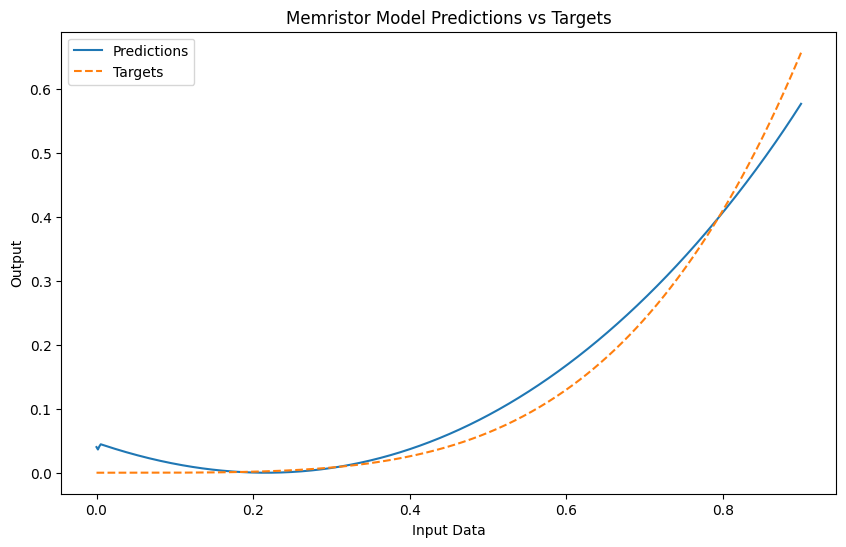

In [4]:
# Plotting

plt.figure(figsize=(10, 6))
plt.plot(X_test, predictions, label='Predictions')
plt.plot(X_test, targets, label='Targets', linestyle='--')
plt.xlabel('Input Data')
plt.ylabel('Output')
plt.title('Memristor Model Predictions vs Targets')
plt.legend()
plt.show()